In [1]:
#importing modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
df=pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#to display stats about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#to display no. of samples of each class(unique values)
df['species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

# Preprocessing the Dataset

In [6]:
#check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis

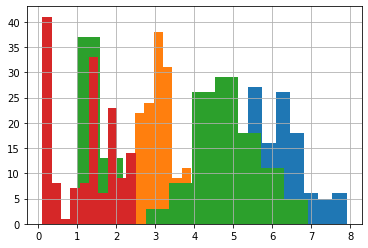

In [7]:
#displaying histograms
df['sepal_length'].hist()
df['sepal_width'].hist()
df['petal_length'].hist()
df['petal_width'].hist()

In [8]:
#scatter plot
colors=['red', 'orange', 'blue']
species=['Iris-versicolor','Iris-setosa','Iris-virginica']

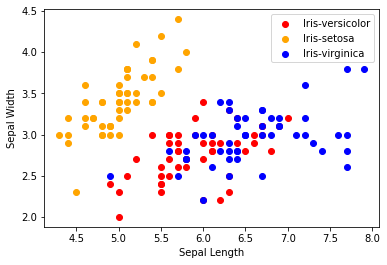

In [9]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

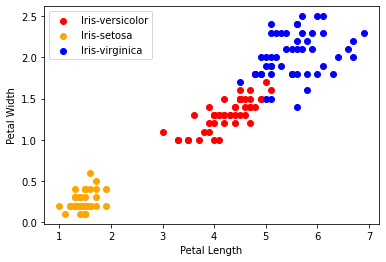

In [10]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'], c=colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

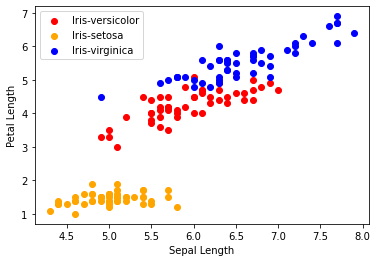

In [11]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

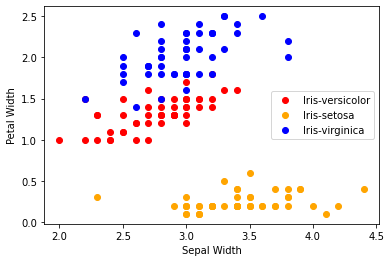

In [12]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'], c=colors[i], label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

# Coorelation Matrix

In [13]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


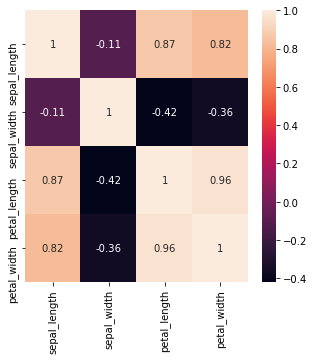

In [14]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax)

# Label Encoder

In [15]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()

In [16]:
# #converting from tex to numeric form
# df['species']=le.fit_transform(df['species'])
# df.head()

# Model Training

In [17]:
from sklearn.model_selection import train_test_split

#dropping colomns(Dependenet and Independent Variables)
X=df.drop(columns=['species'])
Y=df['species']
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.30)

## Logistic Regression

In [18]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=200)

In [19]:
model.fit(x_train, y_train)
print("Training_accuracy: ",model.score(x_train, y_train))

Training_accuracy:  0.9714285714285714


In [20]:
#print metric to get performance
print("Test_accuracy: ",model.score(x_test, y_test))

Test_accuracy:  0.9777777777777777


## KNN 

In [27]:
# #KNN
# from sklearn.neighbors import KNeighborsClassifier
# model=KNeighborsClassifier()

In [28]:
# model.fit(x_train, y_train)
# print("Training_accuracy: ",model.score(x_train, y_train))

In [29]:
# #print metric to get performance
# print("Test_accuracy: ",model.score(x_test, y_test))

## Decision Tree

In [30]:
# #Decision Tree
# from sklearn.tree import DecisionTreeClassifier
# model=DecisionTreeClassifier()

In [31]:
# model.fit(x_train, y_train)
# print("Training_accuracy: ",model.score(x_train, y_train))

In [32]:
# #print metric to get performance
# print("Test_accuracy: ",model.score(x_test, y_test))

# Deploying model

In [37]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,3.6,1.4,0.2
106,4.9,2.5,4.5,1.7
116,6.5,3.0,5.5,1.8
22,4.6,3.6,1.0,0.2
0,5.1,3.5,1.4,0.2


In [38]:
#save the model
import pickle
filename='savemodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [39]:
load_model=pickle.load(open(filename, 'rb'))

In [40]:
load_model.predict([[4.9,2.5,4.5,1.7]])

array(['Iris-versicolor'], dtype=object)